In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df_encoded = pd.read_csv("encoded_features.csv")

X = df_encoded[['Dim1', 'Dim2']]
y = df_encoded['Revenue']


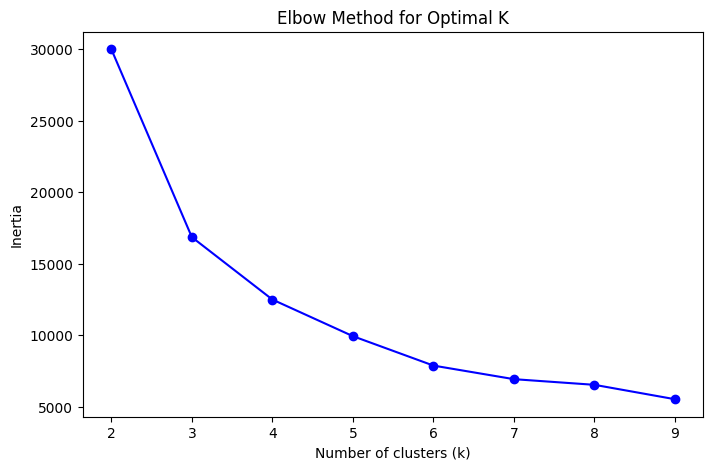

In [ ]:
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(X)

In [ ]:
sil_score = silhouette_score(X, df_encoded['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.539


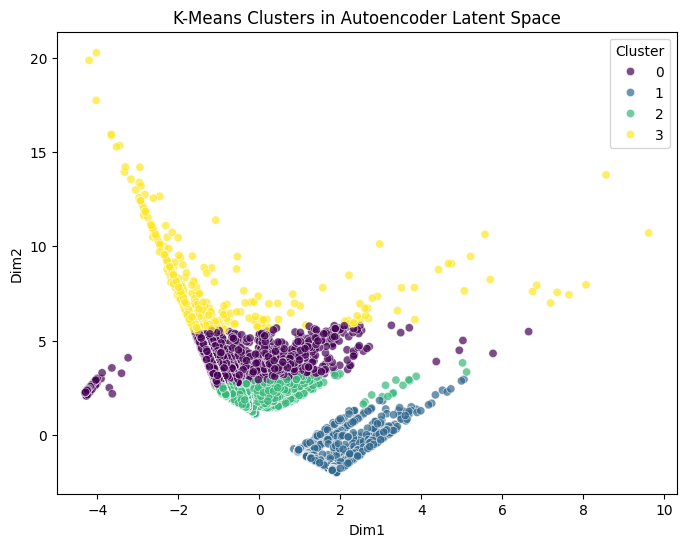

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_encoded, x='Dim1', y='Dim2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title("K-Means Clusters in Autoencoder Latent Space")
plt.show()

   Cluster   Revenue
0        0  0.252457
1        1  0.238295
2        2  0.081207
3        3  0.411348


/tmp/ipython-input-1986721556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_revenue, x='Cluster', y='Revenue', palette='coolwarm')


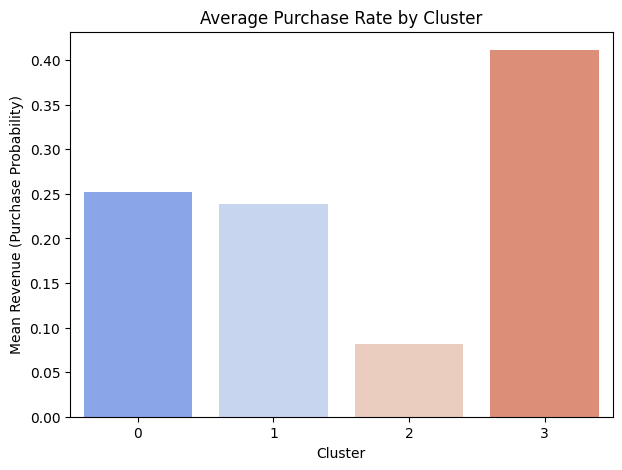

In [ ]:
cluster_revenue = df_encoded.groupby('Cluster')['Revenue'].mean().reset_index()
print(cluster_revenue)

plt.figure(figsize=(7,5))
sns.barplot(data=cluster_revenue, x='Cluster', y='Revenue', palette='coolwarm')
plt.title("Average Purchase Rate by Cluster")
plt.ylabel("Mean Revenue (Purchase Probability)")
plt.show()

In [ ]:
df_lrfs = pd.read_csv("lrfs_features.csv")
df_final = pd.concat([df_lrfs, df_encoded['Cluster']], axis=1)

cluster_profile = df_final.groupby('Cluster')[['L','R','F','S','Revenue']].mean().reset_index()
print(cluster_profile)

   Cluster         L         R         F         S   Revenue
0        0  0.436108 -0.693276  0.561998  0.259399  0.252457
1        1 -2.437460 -0.237391 -0.299482  0.132363  0.238295
2        2  0.360044  0.377514 -0.371704 -0.188655  0.081207
3        3  0.352558 -0.734583  3.664781  0.920312  0.411348


In [ ]:
df_encoded.to_csv("cluster_profile.csv", index=False)
print("✅ Encoded latent features saved at 'cluster_profile.csv'")

✅ Encoded latent features saved at 'cluster_profile.csv'
